In [2]:
from PIL import Image, ImageEnhance  
import warnings
warnings.filterwarnings('ignore')
from tensorflow import keras
import tensorflow as tf
from keras.models import load_model
from keras.models import Model

from keras.applications.vgg16 import preprocess_input
import numpy as np
from keras.preprocessing import image
from keras.layers import Input ,Lambda, Dense, Flatten

from keras.applications import VGG16
from keras.preprocessing.image import ImageDataGenerator
from keras.models import Sequential
from glob import glob
import matplotlib.pyplot as plt

In [3]:
IMAGE_SIZE=(224,224)
train_path="/kaggle/input/chestxraydataset/chest_xray/train"
test_path="/kaggle/input/chestxraydataset/chest_xray/test"

In [4]:
vgg = VGG16(input_shape=IMAGE_SIZE + (3,), weights='imagenet', include_top=False)


58889256/58889256 [==============================] - 0s 0us/step


In [5]:
for layer in vgg.layers:
    layer.trainable = False

In [6]:
folders=glob("/kaggle/input/chestxraydataset/chest_xray/train")
print(len(list(folders)))
x=Flatten()(vgg.output)

1


In [7]:
prediction = Dense(2,activation="softmax")(x)

In [8]:
model = Model(inputs=vgg.input, outputs=prediction)


In [9]:
model.summary()

Model: "model"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 input_1 (InputLayer)        [(None, 224, 224, 3)]     0         
                                                                 
 block1_conv1 (Conv2D)       (None, 224, 224, 64)      1792      
                                                                 
 block1_conv2 (Conv2D)       (None, 224, 224, 64)      36928     
                                                                 
 block1_pool (MaxPooling2D)  (None, 112, 112, 64)      0         
                                                                 
 block2_conv1 (Conv2D)       (None, 112, 112, 128)     73856     
                                                                 
 block2_conv2 (Conv2D)       (None, 112, 112, 128)     147584    
                                                                 
 block2_pool (MaxPooling2D)  (None, 56, 56, 128)       0     

In [10]:
model.compile(
loss ='categorical_crossentropy',
optimizer='adam',
metrics=["accuracy"])

In [1]:
train_datagen=ImageDataGenerator(rescale=1./255,
                                shear_range=0.2,
                                zoom_range=0.2,
                                horizontal_flip=True)

test_datagen=ImageDataGenerator(rescale=1./255)
len(train_datagen)

In [12]:
train_set=train_datagen.flow_from_directory(train_path,
                                             target_size=(224,224),
                                             batch_size=10,
                                             class_mode='categorical')
test_set=train_datagen.flow_from_directory(test_path,
                                             target_size=(224,224),
                                             batch_size=10,
                                             class_mode='categorical')

Found 5216 images belonging to 2 classes.
Found 624 images belonging to 2 classes.


In [13]:
r=model.fit_generator(train_set,
validation_data=test_set,
epochs=1,
steps_per_epoch=len(train_set),
validation_steps=len(test_set))

522/522 [==============================] - 1681s 3s/step - loss: 0.2114 - accuracy: 0.9262 - val_loss: 0.5660 - val_accuracy: 0.8718


In [15]:
model.save('vgg16_model.h5')

In [16]:
ab=load_model('/kaggle/working/vgg16_model.h5')

1/1 [==============================] - 0s 453ms/step
Normal


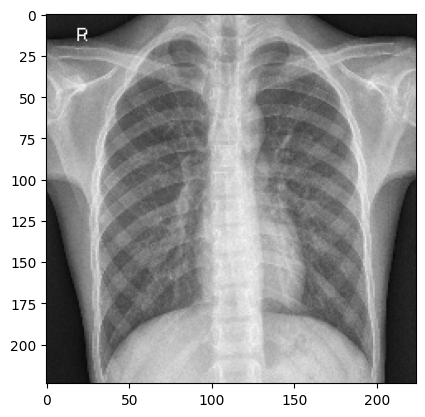

In [31]:
from tensorflow.keras.preprocessing.image import load_img

img = load_img("/kaggle/input/chestxraydataset/chest_xray/test/NORMAL/IM-0005-0001.jpeg", target_size=(224, 224))
img = np.asarray(img)
plt.imshow(img)

img = np.expand_dims(img, axis=0)
from keras.models import load_model
saved_model = load_model("/kaggle/working/vgg16_model.h5")
output = saved_model.predict(img)
if output[0][0] > output[0][1]:
    print("Normal")
else:
    print('Pneumonia')